In [24]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.integrate as integrate
import scipy.stats as stats
from scipy.optimize import curve_fit
from numpy.polynomial.legendre import legval
from decimal import Decimal
import statistics

from IPython.display import display, Latex, HTML

form_title = {'family': 'helvetica', 'color': 'black', 'size': 15}
form_label = {'family': 'helvetica', 'color': 'black', 'size': 20}

# Function of splitting the signal and background
exec(open('functions.py').read())

In [25]:
# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

# MC Luminosity

In [72]:
mcNBB = 182500 * 2. *3000;   mclumi = mcNBB / 1100000.
print(f'Number of BB events (sum of B+B- and B0B0) = {mcNBB:6.3e}')
print(f'MC sample equivalent to {mclumi:.2f} fb-1')

Number of BB events (sum of B+B- and B0B0) = 1.095e+09
MC sample equivalent to 995.45 fb-1


In [73]:
mcNBB = 182500 * (2. *2000 + 1000 + 786);   mclumi = mcNBB / 1100000.
print(f'Number of BB events (sum of B+B- and B0B0) = {mcNBB:6.3e}')
print(f'MC sample equivalent to {mclumi:.2f} fb-1')

Number of BB events (sum of B+B- and B0B0) = 1.056e+09
MC sample equivalent to 959.95 fb-1


In [75]:
mcNBB_charged = 182500 * 3000
mcNBB_mixed = 182500 * (2000 + 786)
print(f'Number of charged BB events (sum of B+B-) = {mcNBB_charged:6.3e}')
print(f'Number of mixed BB events (sum of B0B0) = {mcNBB_mixed:6.3e}')

Number of charged BB events (sum of B+B-) = 5.475e+08
Number of mixed BB events (sum of B0B0) = 5.084e+08


# Cuts

In [27]:
bBestcan = '__candidate__==bBest'

# Data

In [28]:
# No charged particles in ROE and the Eextra_ROE should be less than one
data = pd.read_pickle('semileptonic_Bdecay_data.pkl')

In [29]:
len(data)

515952

In [30]:
%%time
# SB areas were also added
# eta
eta_dfp, eta_rec_modep, eta_gen_modep = sig_bkg_spliter('charged','eta',data)
eta_df0, eta_rec_mode0, eta_gen_mode0 = sig_bkg_spliter('mixed','eta',data)
eta_df = pd.concat([eta_dfp,eta_df0])

CPU times: user 2.14 s, sys: 5.95 s, total: 8.09 s
Wall time: 19.5 s


In [31]:
# signal: signal + peaking background
eta_sig_df = eta_df.drop(index='combinatorial background').reset_index(drop=True)
# min candidate in each event signal
# Note: it will return two data sets, min canidate in each event and the rest
eta_sig_df_mincan, _ = mincand_eachevent(eta_sig_df)
# bBest candiate signal
# Note: you should call the rows where candidate is equal to bBest
eta_sig_df_bBestcan = bBest_cand_newcolumn(eta_sig_df).query(bBestcan)

# background
eta_bkg_df = eta_df.loc['combinatorial background']
# min candidate in each event background
# Note: it will return two data sets, min canidate in each event and the rest
eta_bkg_df_mincan, _ = mincand_eachevent(eta_bkg_df)
# bBest candidate background
# Note: you should call the rows where candidate is equal to bBest
eta_bkg_df_bBestcan = bBest_cand_newcolumn(eta_bkg_df).query(bBestcan)

# taking the invariant mass of eta for both B0 and B1
# signal
eta_sig_InvM = pd.concat([eta_sig_df['pi4_B0_InvM'], eta_sig_df['pi4_B1_InvM']]).dropna()
eta_sig_InvM_mincan = pd.concat([eta_sig_df_mincan['pi4_B0_InvM'], eta_sig_df_mincan['pi4_B1_InvM']]).dropna()
eta_sig_InvM_bBestcan = pd.concat([eta_sig_df_bBestcan['pi4_B0_InvM'], eta_sig_df_bBestcan['pi4_B1_InvM']]).dropna()
# background
eta_bkg_InvM = pd.concat([eta_bkg_df['pi4_B0_InvM'], eta_bkg_df['pi4_B1_InvM']]).dropna()
eta_bkg_InvM_mincan = pd.concat([eta_bkg_df_mincan['pi4_B0_InvM'], eta_bkg_df_mincan['pi4_B1_InvM']]).dropna()
eta_bkg_InvM_bBestcan = pd.concat([eta_bkg_df_bBestcan['pi4_B0_InvM'], eta_bkg_df_bBestcan['pi4_B1_InvM']]).dropna()

In [65]:
df_pkg, _ = mincand_eachevent(eta_df.loc['peaking background'])
df_pkg

,__experiment__,__run__,__event__,__production__,__candidate__,__ncandidates__,__weight__,Ecms,aBminusMode,aBplusMode,...,MCGenPDG_45,MCGenMothIndex_45,MCGenPDG_46,MCGenMothIndex_46,MCGenPDG_47,MCGenMothIndex_47,MCGenPDG_48,MCGenMothIndex_48,MCGenPDG_49,MCGenMothIndex_49
159290,1003,0,45823,24817,2,9,1.0,10.579557,-1683.0,101001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
544400,1003,0,173299,24819,1,9,1.0,10.579557,-201002.0,1682.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378253,1003,0,440042,24825,1,9,1.0,10.579557,-99.0,-99.0,...,-211.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164341,1003,0,556823,24817,7,9,1.0,10.579557,-1001.0,1764.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674208,1003,0,654609,24820,3,8,1.0,10.579557,-1687.0,1021.0,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,39.0,22.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605587,1003,0,106914223,24819,6,9,1.0,10.579557,-1684.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390153,1003,0,107066095,24818,0,9,1.0,10.579557,-1625.0,1021.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
603690,1003,0,107358382,24819,0,9,1.0,10.579557,-1683.0,1022.0,...,NaN,NaN,22.0,32.0,22.0,32.0,NaN,NaN,NaN,NaN
94864,1003,0,107785543,24816,1,9,1.0,10.579557,-1022.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plot

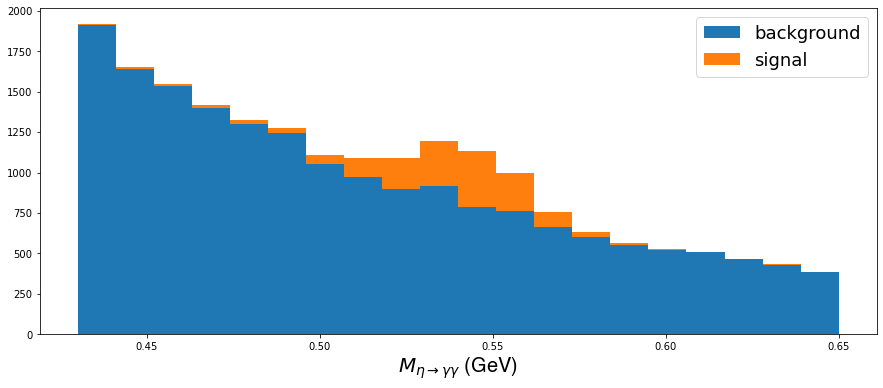

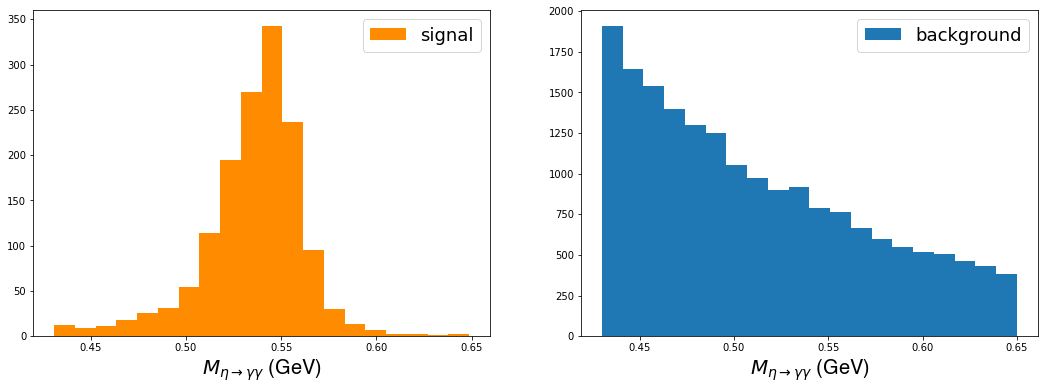

In [32]:
plt.figure(figsize=(15,6))
eta_counts_mincan, eta_edges_mincan, _ = plt.hist([eta_bkg_InvM_mincan, eta_sig_InvM_mincan],bins=20,histtype='barstacked', label=['background','signal'])
plt.xlabel(r'$M_{\eta \rightarrow \gamma \gamma}$ (GeV)', fontdict=form_label)
plt.legend(fontsize=18)

plt.figure(figsize=(18,6))
plt.subplot(121)
eta_sig_counts_mincan, eta_sig_edges_mincan, _ = plt.hist(eta_sig_InvM_mincan,bins=20,color ='darkorange', label=['signal'])
plt.xlabel(r'$M_{\eta \rightarrow \gamma \gamma}$ (GeV)', fontdict=form_label)
plt.legend(fontsize=18)

plt.subplot(122)
eta_bkg_counts_mincan, eta_bkg_edges_mincan, _ = plt.hist(eta_bkg_InvM_mincan,bins=20,histtype='barstacked', label=['background'])
plt.xlabel(r'$M_{\eta \rightarrow \gamma \gamma}$ (GeV)', fontdict=form_label)
plt.legend(fontsize=18)


In [63]:
np.sum(eta_sig_counts_mincan)/mclumi

1.4827397260273971

In [33]:
np.min(eta_edges_mincan)

0.4300001521072136

# Data for fitting

There is a problem by peaking the y data for signal based on the both signal and background histogram. by looking at the hist you see maximum edge for dignal is 0.63 but the hist goes to 0.65, `so eta_y_sig_data = eta_counts_mincan[1] - eta_counts_mincan[0]` is a wrong approach.

In [34]:
# x range
eta_x_data = (eta_edges_mincan[1:] + eta_edges_mincan[:-1])/2

# mapped x range to [-1,1]
y = np.array(mapping_range(eta_edges_mincan, -1, 1))
eta_x_data_mapped = (y[1:] + y[:-1])/2

# y range
# signal
# eta_y_sig_data = eta_counts_mincan[1] - eta_counts_mincan[0]
eta_y_sig_data = eta_sig_counts_mincan
eta_yerr_sig = np.sqrt(eta_y_sig_data)
# background
eta_y_bkg_data = eta_counts_mincan[0]
eta_yerr_bkg = np.sqrt(eta_y_bkg_data)
# both signal and background
eta_y_data = (eta_counts_mincan[1] - eta_counts_mincan[0]) + eta_counts_mincan[0]
eta_yerr = np.sqrt(eta_y_data)

# Fitting

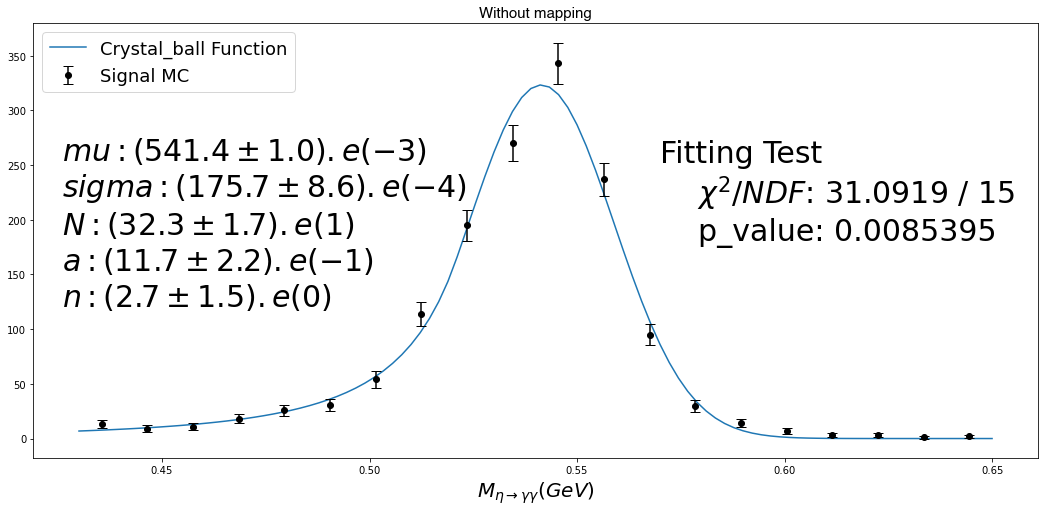

In [35]:
# fitting signal no mapping
p0_sig = [0.5, 0.02, 350, 1, 2]
eta_sig_popt, eta_sig_pcov, eta_sig_info, eta_sig_msg, eta_sig_ier = curve_fit(crystal_ball, eta_x_data, eta_y_sig_data, p0=p0_sig, full_output=True, sigma=eta_yerr_sig)

# degrees of freedom
eta_sig_ndf = ndf(eta_x_data, eta_sig_popt)

plt.figure(figsize=(18,8))
x_range = np.linspace(np.min(eta_edges_mincan), np.max(eta_edges_mincan), 100) 
plt.plot(x_range, crystal_ball(x_range, *eta_sig_popt), label='Crystal_ball Function')
plt.errorbar(eta_x_data, eta_y_sig_data, yerr=eta_yerr_sig, ls='', color='k', fmt='o', capsize=5, label='Signal MC')
plt.xlabel(r'$M_{\eta \rightarrow \gamma \gamma} (GeV)$', fontdict=form_label)
plt.title('Without mapping', fontdict=form_title)
plt.text(0.57, 150, 
f'''Fitting Test
    $\chi^2/NDF$: {np.dot(eta_sig_info['fvec'], eta_sig_info['fvec']):.4f} / {eta_sig_ndf}
    p_value: {1 - stats.chi2.cdf(np.dot(eta_sig_info['fvec'], eta_sig_info['fvec']), eta_sig_ndf):.7f}
    ''', fontsize=30)

text = value_uncertainty_report(eta_sig_popt, eta_sig_pcov, ['mu', 'sigma', 'N', 'a', 'n'])
plt.text(0.426,90, text, fontsize=30)

plt.legend(fontsize=18, loc='upper left')


In [36]:
len(eta_yerr_sig)

20

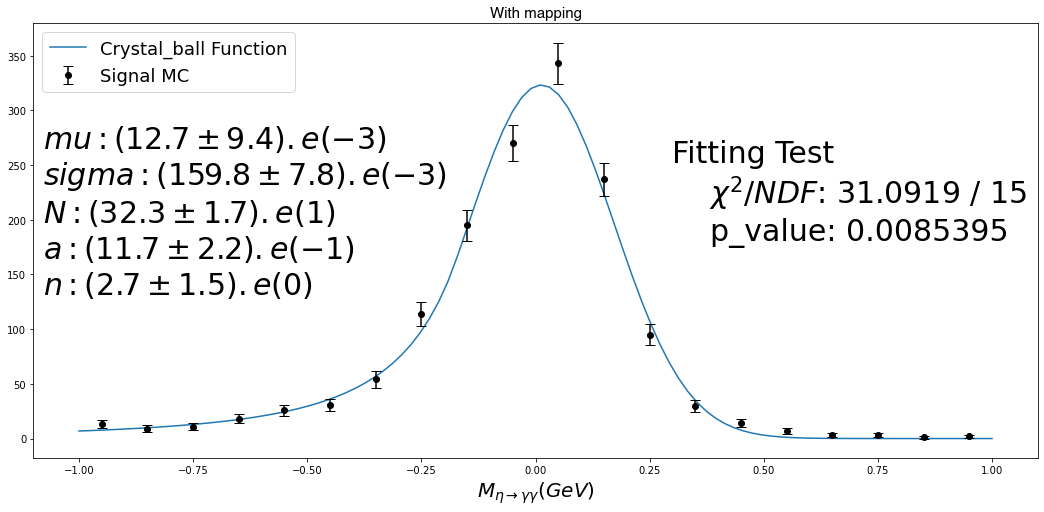

In [37]:
# fitting signal mapping to [-1,1]
p0_sig = [0.05, 0.02, 300, 2, 3]
eta_sig_popt_mapped, eta_sig_pcov_mapped, eta_sig_info_mapped, eta_sig_msg_mapped, eta_sig_ier_mapped = curve_fit(crystal_ball, eta_x_data_mapped, eta_y_sig_data, p0=p0_sig, full_output=True, sigma=eta_yerr_sig)

# degrees of freedom
eta_sig_ndf = ndf(eta_x_data, eta_sig_popt_mapped)

plt.figure(figsize=(18,8))
x_range = np.linspace(np.min(y), np.max(y), 100)
plt.plot(x_range, crystal_ball(x_range, *eta_sig_popt_mapped), label='Crystal_ball Function')
plt.errorbar(eta_x_data_mapped, eta_y_sig_data, yerr=eta_yerr_sig, ls='', color='k', fmt='o', capsize=5, label='Signal MC')
plt.xlabel(r'$M_{\eta \rightarrow \gamma \gamma} (GeV)$', fontdict=form_label)
plt.title('With mapping', fontdict=form_title)
plt.text(0.3, 150, 
f'''Fitting Test
    $\chi^2/NDF$: {np.dot(eta_sig_info_mapped['fvec'], eta_sig_info_mapped['fvec']):.4f} / {eta_sig_ndf}
    p_value: {1 - stats.chi2.cdf(np.dot(eta_sig_info_mapped['fvec'], eta_sig_info_mapped['fvec']), eta_sig_ndf):.7f}
    ''', fontsize=30)

text = value_uncertainty_report(eta_sig_popt_mapped, eta_sig_pcov_mapped, ['mu', 'sigma', 'N', 'a', 'n'])
plt.text(0.01,0.3, text, fontsize=30, transform=plt.gca().transAxes)

plt.legend(fontsize=18, loc='upper left')


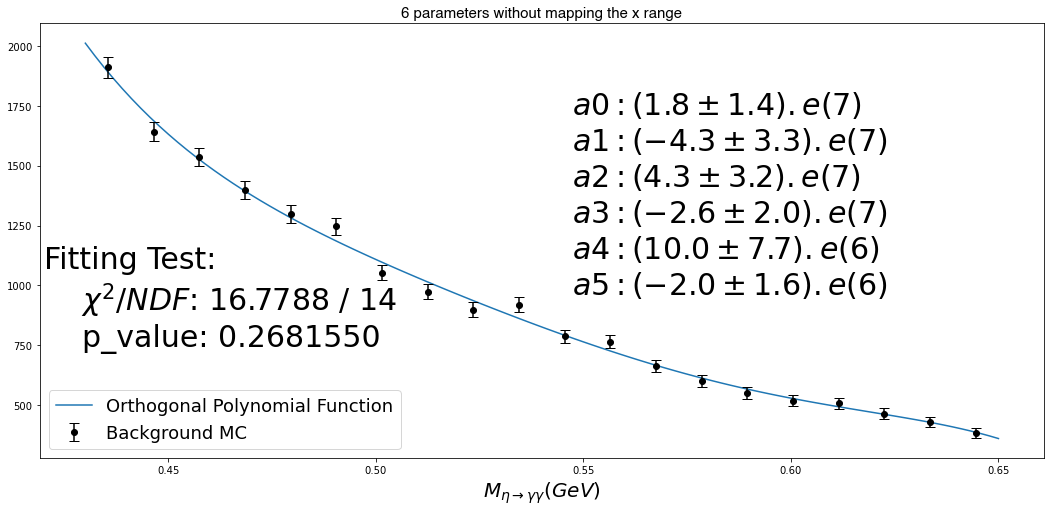

In [38]:
# fitting background 6 parameters no mapping
p0_bkg6 = list(np.zeros(6))
eta_bkg_popt6, eta_bkg_pcov6, eta_bkg_info6, eta_bkg_msg6, eta_bkg_ier6 = curve_fit(legendre, eta_x_data, eta_y_bkg_data, p0=p0_bkg6, full_output=True, sigma=eta_yerr_bkg)

# degrees of freedom
eta_bkg_ndf6 = ndf(eta_x_data, eta_bkg_popt6)

plt.figure(figsize=(18,8))
x_range = np.linspace(np.min(eta_edges_mincan), np.max(eta_edges_mincan), 100)
plt.plot(x_range, legendre(x_range, *eta_bkg_popt6), label='Orthogonal Polynomial Function')
plt.errorbar(eta_x_data, eta_y_bkg_data, yerr=eta_yerr_bkg, ls='', color='k', fmt='o', capsize=5, label='Background MC')
plt.xlabel(r'$M_{\eta \rightarrow \gamma \gamma} (GeV)$', fontdict=form_label)
plt.title('6 parameters without mapping the x range', fontdict=form_title)
plt.text(0.42, 600, 
f'''Fitting Test:
    $\chi^2/NDF$: {np.dot(eta_bkg_info6['fvec'], eta_bkg_info6['fvec']):.4f} / {eta_bkg_ndf6}
    p_value: {1 - stats.chi2.cdf(np.dot(eta_bkg_info6['fvec'], eta_bkg_info6['fvec']), eta_bkg_ndf6):.7f}
    ''', fontsize=30)

text = value_uncertainty_report(eta_bkg_popt6, eta_bkg_pcov6)
plt.text(0.53, 0.3, text, transform=plt.gca().transAxes, fontsize=30)


plt.legend(fontsize=18, loc='lower left')

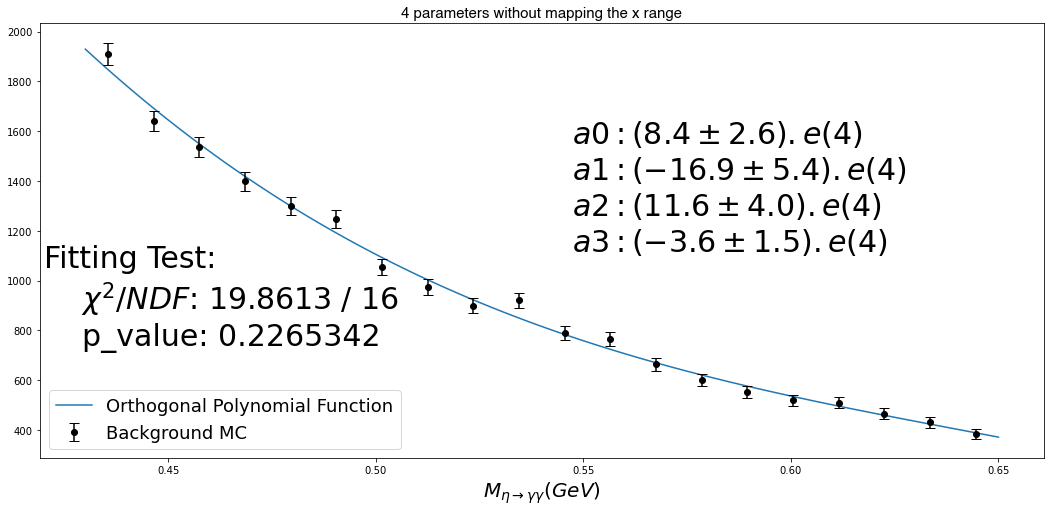

In [39]:
# fitting background 4 parameters no mapping
p0_bkg4 = list(np.zeros(4))
eta_bkg_popt4, eta_bkg_pcov4, eta_bkg_info4, eta_bkg_msg4, eta_bkg_ier4 = curve_fit(legendre, eta_x_data, eta_y_bkg_data, p0=p0_bkg4, full_output=True, sigma=eta_yerr_bkg)

# degrees of freedom
eta_bkg_ndf4 = ndf(eta_x_data, eta_bkg_popt4)

plt.figure(figsize=(18,8))
x_range = np.linspace(np.min(eta_edges_mincan), np.max(eta_edges_mincan), 100)
plt.plot(x_range, legendre(x_range, *eta_bkg_popt4), label='Orthogonal Polynomial Function')
plt.errorbar(eta_x_data, eta_y_bkg_data, yerr=eta_yerr_bkg, ls='', color='k', fmt='o', capsize=5, label='Background MC')
plt.xlabel(r'$M_{\eta \rightarrow \gamma \gamma} (GeV)$', fontdict=form_label)
plt.title('4 parameters without mapping the x range', fontdict=form_title)
plt.text(0.42, 600, 
f'''Fitting Test:
    $\chi^2/NDF$: {np.dot(eta_bkg_info4['fvec'], eta_bkg_info4['fvec']):.4f} / {eta_bkg_ndf4}
    p_value: {1 - stats.chi2.cdf(np.dot(eta_bkg_info4['fvec'], eta_bkg_info4['fvec']), eta_bkg_ndf4):.7f}
    ''', fontsize=30)

text = value_uncertainty_report(eta_bkg_popt4, eta_bkg_pcov4)
plt.text(0.53, 0.4, text, transform=plt.gca().transAxes, fontsize=30)


plt.legend(fontsize=18, loc='lower left')

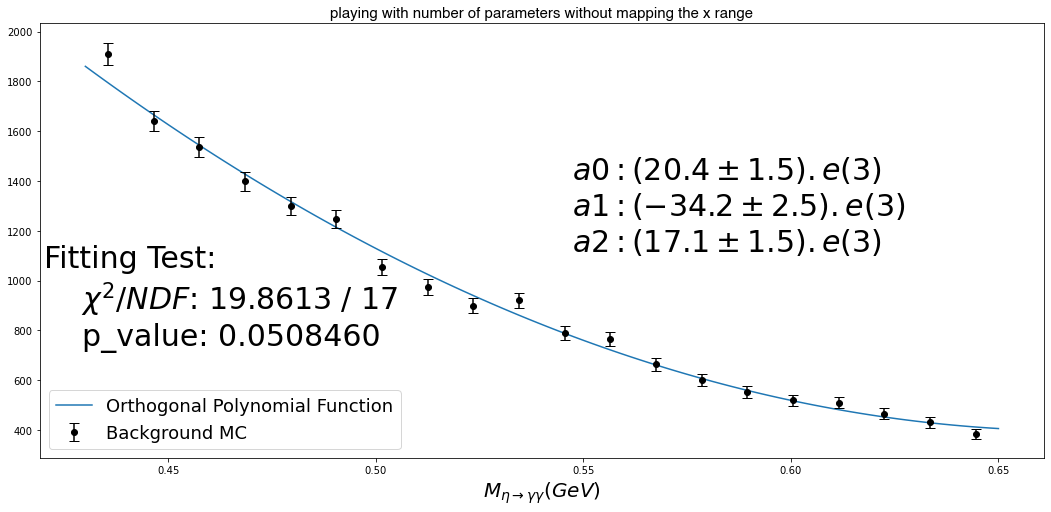

In [40]:
# playing with different number of parameters
p0_bkg = list(np.zeros(3))
eta_bkg_popt, eta_bkg_pcov, eta_bkg_info, eta_bkg_msg, eta_bkg_ier = curve_fit(legendre, eta_x_data, eta_y_bkg_data, p0=p0_bkg, full_output=True, sigma=eta_yerr_bkg)

# degrees of freedom
eta_bkg_ndf = ndf(eta_x_data, eta_bkg_popt)

plt.figure(figsize=(18,8))
x_range = np.linspace(np.min(eta_edges_mincan), np.max(eta_edges_mincan), 100)
plt.plot(x_range, legendre(x_range, *eta_bkg_popt), label='Orthogonal Polynomial Function')
plt.errorbar(eta_x_data, eta_y_bkg_data, yerr=eta_yerr_bkg, ls='', color='k', fmt='o', capsize=5, label='Background MC')
plt.xlabel(r'$M_{\eta \rightarrow \gamma \gamma} (GeV)$', fontdict=form_label)
plt.title('playing with number of parameters without mapping the x range', fontdict=form_title)
plt.text(0.42, 600, 
f'''Fitting Test:
    $\chi^2/NDF$: {np.dot(eta_bkg_info4['fvec'], eta_bkg_info4['fvec']):.4f} / {eta_bkg_ndf}
    p_value: {1 - stats.chi2.cdf(np.dot(eta_bkg_info['fvec'], eta_bkg_info['fvec']), eta_bkg_ndf):.7f}
    ''', fontsize=30)

text = value_uncertainty_report(eta_bkg_popt, eta_bkg_pcov)
plt.text(0.53, 0.4, text, transform=plt.gca().transAxes, fontsize=30)


plt.legend(fontsize=18, loc='lower left')

### not mapping the x range but changing the legendre function 

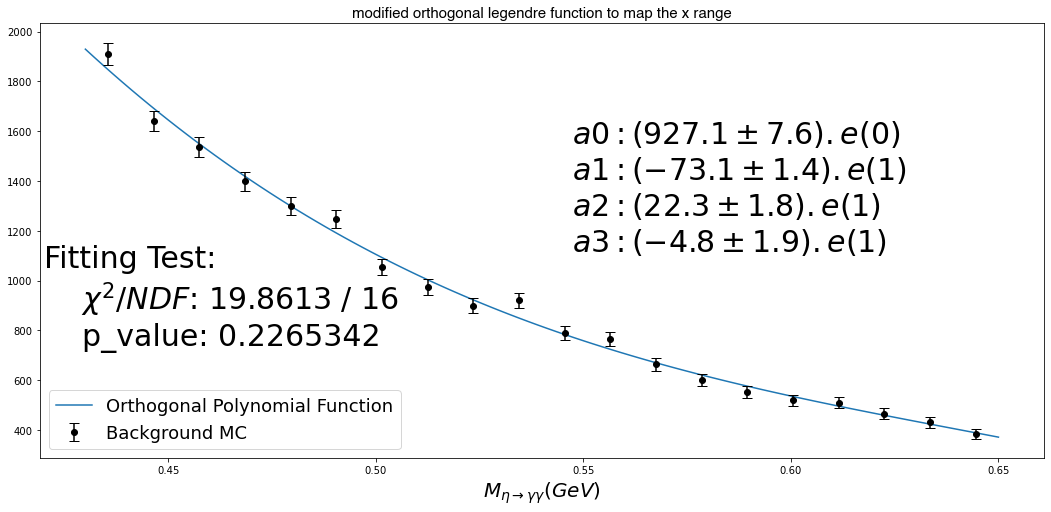

In [58]:
# fitting background 4 parameters modified legendre function
p0_bkg = list(np.zeros(4))
eta_bkg_popt_modified4, eta_bkg_pcov_modified4, eta_bkg_info_modified4, eta_bkg_msg_modified4, eta_bkg_ier_modified4 = curve_fit(legendre_mod, eta_edges_mincan, eta_y_bkg_data, p0=p0_bkg, full_output=True, sigma=eta_yerr_bkg)

# degrees of freedom
eta_bkg_ndf = ndf(eta_x_data, eta_bkg_popt_modified4)

plt.figure(figsize=(18,8))
x_range = np.linspace(np.min(eta_edges_mincan), np.max(eta_edges_mincan), 100)
plt.plot(x_range, legendre_mod(x_range, *eta_bkg_popt_modified4, calculate_middle_point=False), label='Orthogonal Polynomial Function')
plt.errorbar(eta_x_data, eta_y_bkg_data, yerr=eta_yerr_bkg, ls='', color='k', fmt='o', capsize=5, label='Background MC')
plt.xlabel(r'$M_{\eta \rightarrow \gamma \gamma} (GeV)$', fontdict=form_label)
plt.title('modified orthogonal legendre function to map the x range', fontdict=form_title)
plt.text(0.42, 600, 
f'''Fitting Test:
    $\chi^2/NDF$: {np.dot(eta_bkg_info_modified4['fvec'], eta_bkg_info_modified4['fvec']):.4f} / {eta_bkg_ndf}
    p_value: {1 - stats.chi2.cdf(np.dot(eta_bkg_info_modified4['fvec'], eta_bkg_info_modified4['fvec']), eta_bkg_ndf):.7f}
    ''', fontsize=30)

text = value_uncertainty_report(eta_bkg_popt_modified4, eta_bkg_pcov_modified4)
plt.text(0.53, 0.4, text, transform=plt.gca().transAxes, fontsize=30)


plt.legend(fontsize=18, loc='lower left')

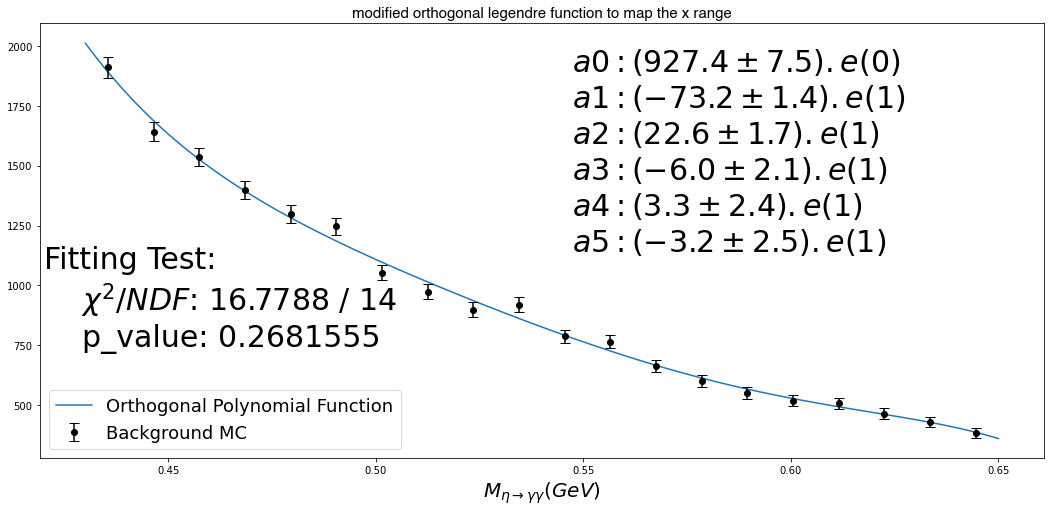

In [57]:
# fitting background 4 parameters modified legendre function
p0_bkg = list(np.zeros(6))
eta_bkg_popt_modified6, eta_bkg_pcov_modified6, eta_bkg_info_modified6, eta_bkg_msg_modified6, eta_bkg_ier_modified6 = curve_fit(legendre_mod, eta_edges_mincan, eta_y_bkg_data, p0=p0_bkg, full_output=True, sigma=eta_yerr_bkg)

# degrees of freedom
eta_bkg_ndf = ndf(eta_x_data, eta_bkg_popt_modified6)

plt.figure(figsize=(18,8))
x_range = np.linspace(np.min(eta_edges_mincan), np.max(eta_edges_mincan), 100)
plt.plot(x_range, legendre_mod(x_range, *eta_bkg_popt_modified6, calculate_middle_point=False), label='Orthogonal Polynomial Function')
plt.errorbar(eta_x_data, eta_y_bkg_data, yerr=eta_yerr_bkg, ls='', color='k', fmt='o', capsize=5, label='Background MC')
plt.xlabel(r'$M_{\eta \rightarrow \gamma \gamma} (GeV)$', fontdict=form_label)
plt.title('modified orthogonal legendre function to map the x range', fontdict=form_title)
plt.text(0.42, 600, 
f'''Fitting Test:
    $\chi^2/NDF$: {np.dot(eta_bkg_info_modified6['fvec'], eta_bkg_info_modified6['fvec']):.4f} / {eta_bkg_ndf}
    p_value: {1 - stats.chi2.cdf(np.dot(eta_bkg_info_modified6['fvec'], eta_bkg_info_modified6['fvec']), eta_bkg_ndf):.7f}
    ''', fontsize=30)

text = value_uncertainty_report(eta_bkg_popt_modified6, eta_bkg_pcov_modified6)
plt.text(0.53, 0.4, text, transform=plt.gca().transAxes, fontsize=30)


plt.legend(fontsize=18, loc='lower left')

### mapping the x range

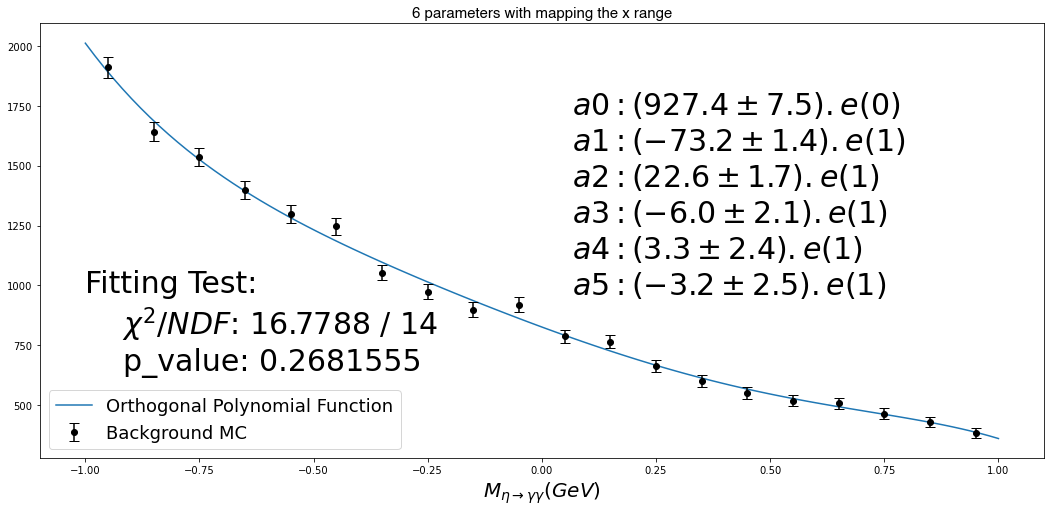

In [43]:
# fitting background 6 parameters mapping to [-1,1]
p0_bkg6 = list(np.zeros(6))
eta_bkg_popt_mapped6, eta_bkg_pcov_mapped6, eta_bkg_info_mapped6, eta_bkg_msg_mapped6, eta_bkg_ier_mapped6 = curve_fit(legendre, eta_x_data_mapped, eta_y_bkg_data, p0=p0_bkg6, full_output=True, sigma=eta_yerr_bkg)

# degrees of freedom
eta_bkg_ndf_mapped6 = ndf(eta_x_data_mapped, eta_bkg_popt_mapped6)

plt.figure(figsize=(18,8))
x_range = np.linspace(np.min(y), np.max(y), 100)
plt.plot(x_range, legendre(x_range, *eta_bkg_popt_mapped6), label='Orthogonal Polynomial Function')
plt.errorbar(eta_x_data_mapped, eta_y_bkg_data, yerr=eta_yerr_bkg, ls='', color='k', fmt='o', capsize=5, label='Background MC')
plt.xlabel(r'$M_{\eta \rightarrow \gamma \gamma} (GeV)$', fontdict=form_label)
plt.title('6 parameters with mapping the x range', fontdict=form_title)
plt.text(-1, 500, 
f'''Fitting Test:
    $\chi^2/NDF$: {np.dot(eta_bkg_info_mapped6['fvec'], eta_bkg_info_mapped6['fvec']):.4f} / {eta_bkg_ndf_mapped6}
    p_value: {1 - stats.chi2.cdf(np.dot(eta_bkg_info_mapped6['fvec'], eta_bkg_info_mapped6['fvec']), eta_bkg_ndf_mapped6):.7f}
    ''', fontsize=30)

text = value_uncertainty_report(eta_bkg_popt_mapped6, eta_bkg_pcov_mapped6)
plt.text(0.53, 0.3, text, transform=plt.gca().transAxes, fontsize=30)

plt.legend(fontsize=18, loc='lower left')

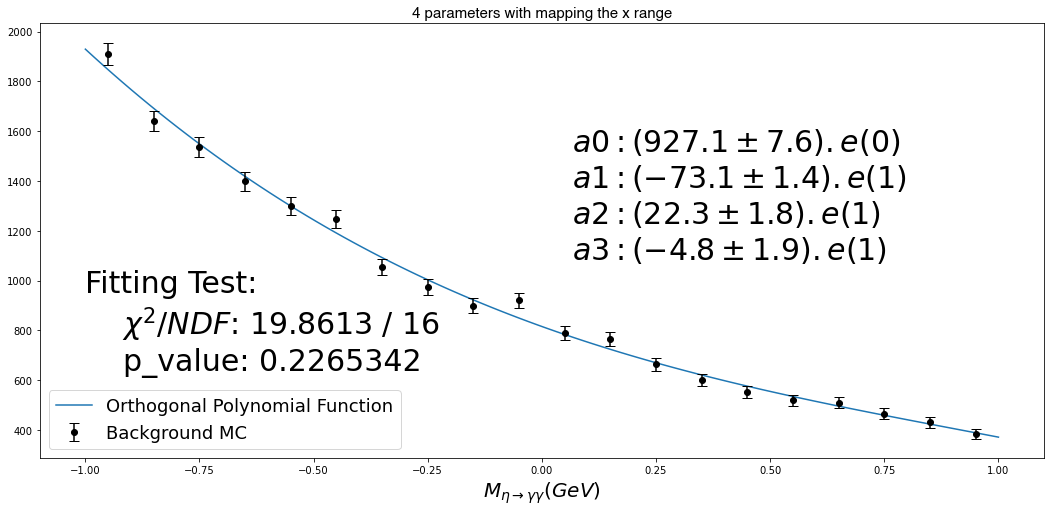

In [44]:
# fitting background 4 parameters mapping to [-1,1]
p0_bkg4 = list(np.zeros(4))
eta_bkg_popt_mapped4, eta_bkg_pcov_mapped4, eta_bkg_info_mapped4, eta_bkg_msg_mapped4, eta_bkg_ier_mapped4 = curve_fit(legendre, eta_x_data_mapped, eta_y_bkg_data, p0=p0_bkg4, full_output=True, sigma=eta_yerr_bkg)

# degrees of freedom
eta_bkg_ndf_mapped4 = ndf(eta_x_data_mapped, eta_bkg_popt_mapped4)

plt.figure(figsize=(18,8))
x_range = np.linspace(np.min(y), np.max(y), 100)
plt.plot(x_range, legendre(x_range, *eta_bkg_popt_mapped4), label='Orthogonal Polynomial Function')
plt.errorbar(eta_x_data_mapped, eta_y_bkg_data, yerr=eta_yerr_bkg, ls='', color='k', fmt='o', capsize=5, label='Background MC')
plt.xlabel(r'$M_{\eta \rightarrow \gamma \gamma} (GeV)$', fontdict=form_label)
plt.title('4 parameters with mapping the x range', fontdict=form_title)
plt.text(-1, 500, 
f'''Fitting Test:
    $\chi^2/NDF$: {np.dot(eta_bkg_info_mapped4['fvec'], eta_bkg_info_mapped4['fvec']):.4f} / {eta_bkg_ndf_mapped4}
    p_value: {1 - stats.chi2.cdf(np.dot(eta_bkg_info_mapped4['fvec'], eta_bkg_info_mapped4['fvec']), eta_bkg_ndf_mapped4):.7f}
    ''', fontsize=30)

text = value_uncertainty_report(eta_bkg_popt_mapped4, eta_bkg_pcov_mapped4)
plt.text(0.53, 0.38, text, transform=plt.gca().transAxes, fontsize=30)

plt.legend(fontsize=18, loc='lower left')

## Correlation Matrix Signal and Background Parameters

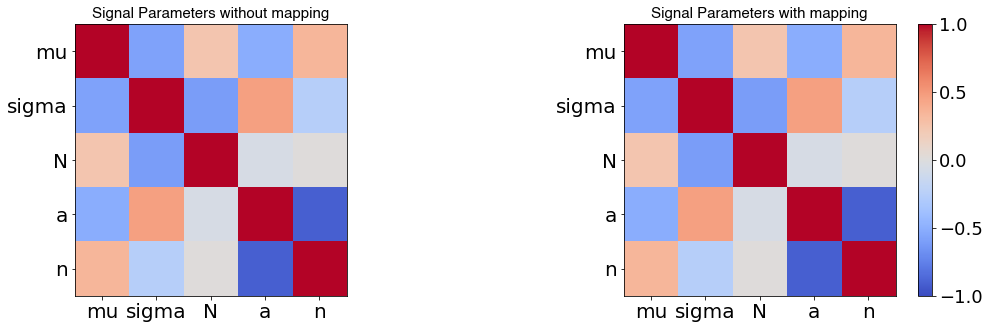

In [45]:
# signal
eta_sig_std_devs = np.sqrt(np.diag(eta_sig_pcov))
eta_sig_correlation_matrix = eta_sig_pcov / np.outer(eta_sig_std_devs, eta_sig_std_devs)

eta_sig_std_devs_mapped = np.sqrt(np.diag(eta_sig_pcov_mapped))
eta_sig_correlation_matrix_mapped = eta_sig_pcov_mapped / np.outer(eta_sig_std_devs_mapped, eta_sig_std_devs_mapped)

l_sig = ['mu', 'sigma', 'N', 'a', 'n']

plt.figure(figsize=(18,5))
plt.subplot(121)
plt.imshow(eta_sig_correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(np.arange(5), l_sig, fontsize=20)
plt.yticks(np.arange(5), l_sig, fontsize=20)
plt.title('Signal Parameters without mapping', fontdict=form_title)

plt.subplot(122)
plt.imshow(eta_sig_correlation_matrix_mapped, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(np.arange(5), l_sig, fontsize=20)
plt.yticks(np.arange(5), l_sig, fontsize=20)
plt.title('Signal Parameters with mapping', fontdict=form_title)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
plt.show()

In [46]:
# background
pcovs_list = [eta_bkg_pcov6, eta_bkg_pcov4, eta_bkg_pcov_mapped6, eta_bkg_pcov_mapped4]
pcovs_name = ['eta_bkg_pcov6', 'eta_bkg_pcov4', 'eta_bkg_pcov_mapped6', 'eta_bkg_pcov_mapped4']

eta_bkg_correlation_matrix_dict = {}

for pcov in range(len(pcovs_list)):
    eta_bkg_std_devs = np.sqrt(np.diag(pcovs_list[pcov]))
    eta_bkg_correlation_matrix_dict[pcovs_name[pcov]] = pcovs_list[pcov] / np.outer(eta_bkg_std_devs, eta_bkg_std_devs)

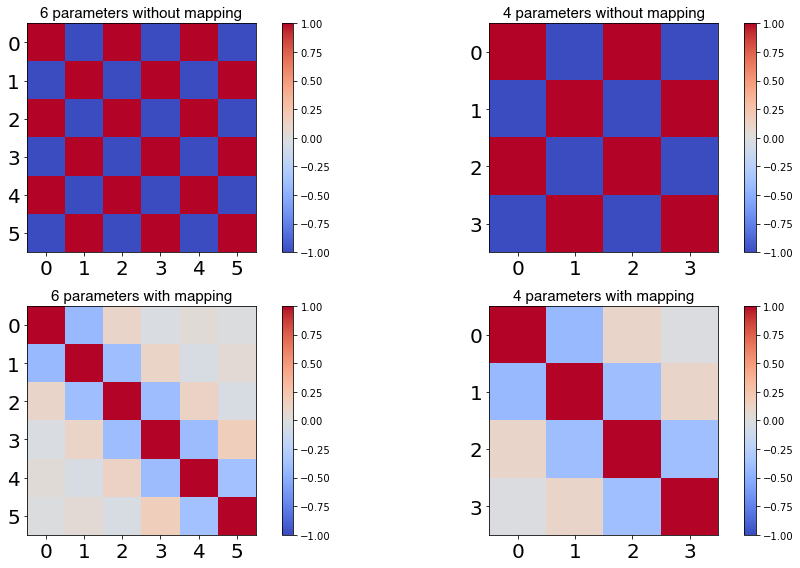

In [47]:
plt.figure(figsize=(14,8))

plt.subplot(221)
plt.imshow(eta_bkg_correlation_matrix_dict['eta_bkg_pcov6'], cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(np.arange(6), [i for i in range(6)], fontsize=20)
plt.yticks(np.arange(6), [i for i in range(6)], fontsize=20)
plt.title('6 parameters without mapping', fontdict=form_title)
plt.colorbar()

plt.subplot(222)
plt.imshow(eta_bkg_correlation_matrix_dict['eta_bkg_pcov4'], cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(np.arange(4), [i for i in range(4)], fontsize=20)
plt.yticks(np.arange(4), [i for i in range(4)], fontsize=20)
plt.title('4 parameters without mapping', fontdict=form_title)
plt.colorbar()

plt.subplot(223)
plt.imshow(eta_bkg_correlation_matrix_dict['eta_bkg_pcov_mapped6'], cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(np.arange(6), [i for i in range(6)], fontsize=20)
plt.yticks(np.arange(6), [i for i in range(6)], fontsize=20)
plt.title('6 parameters with mapping', fontdict=form_title)
plt.colorbar()

plt.subplot(224)
plt.imshow(eta_bkg_correlation_matrix_dict['eta_bkg_pcov_mapped4'], cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(np.arange(4), [i for i in range(4)], fontsize=20)
plt.yticks(np.arange(4), [i for i in range(4)], fontsize=20)
plt.title('4 parameters with mapping', fontdict=form_title)
plt.colorbar()

plt.tight_layout()

# Fitting Signal and Background

In [48]:
def crystal_legendre_fixed_params(x, *params):
    p_signal, p_background= params
    return p_signal * crystal_ball(x, *eta_sig_popt) + p_background * legendre(x, *eta_bkg_popt6)

def crystal_legendre_mu_float(x, *params):
    p_signal, p_background, mu = params
    return p_signal * crystal_ball(x, mu, *eta_sig_popt[1:]) + p_background * legendre(x, *eta_bkg_popt6)

def crystal_legendre_musigma_float(x, *params):
    p_signal, p_background, mu, sigma = params
    return p_signal * crystal_ball(x, mu, sigma, *eta_sig_popt[2:]) + p_background * legendre(x, *eta_bkg_popt6)


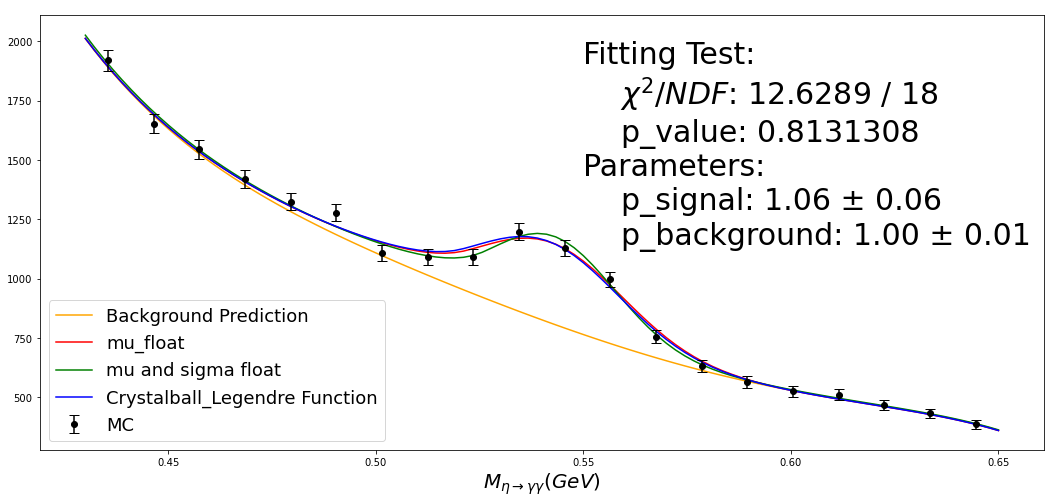

In [49]:
p0_fixed_params = [0.8, 1]
p0_mu_float = [0.8, 1, 0.57]
p0_musigma_float = [0.8, 1, 0.57, 0.1]
eta_popt_fixed_params, eta_pcov_fixed_params, eta_info_fixed_params, eta_msg_fixed_params, eta_ier_fixed_params = curve_fit(crystal_legendre_fixed_params, eta_x_data, eta_y_data, p0=p0_fixed_params, full_output=True, sigma=eta_yerr)
eta_popt_mu_float, eta_pcov_mu_float, eta_info_mu_float, eta_msg_mu_float, eta_ier_mu_float = curve_fit(crystal_legendre_mu_float, eta_x_data, eta_y_data, p0=p0_mu_float, full_output=True, sigma=eta_yerr)
eta_popt_musigma_float, eta_pcov_musigma_float, eta_info_musigma_float, eta_msg_musigma_float, eta_ier_musigma_float = curve_fit(crystal_legendre_musigma_float, eta_x_data, eta_y_data, p0=p0_musigma_float, full_output=True, sigma=eta_yerr)

# degrees of freedom
eta_ndf_fixed_params = ndf(eta_x_data, eta_popt_fixed_params)
eta_ndf_mu_float = ndf(eta_x_data, eta_popt_mu_float)
eta_ndf_musigma_float = ndf(eta_x_data, eta_popt_musigma_float)

plt.figure(figsize=(18,8))
x_range = np.linspace(np.min(eta_edges_mincan), np.max(eta_edges_mincan), 100)
plt.plot(x_range, legendre(x_range, *eta_bkg_popt6), label='Background Prediction', color='orange')
plt.plot(x_range, crystal_legendre_mu_float(x_range, *eta_popt_mu_float), label='mu_float', color='r')
plt.plot(x_range, crystal_legendre_musigma_float(x_range, *eta_popt_musigma_float), label='mu and sigma float', color='g')
plt.plot(x_range, crystal_legendre_fixed_params(x_range, *eta_popt_fixed_params), label='Crystalball_Legendre Function', color='b')
plt.errorbar(eta_x_data, eta_y_data, yerr=eta_yerr, ls='', color='k', fmt='o', capsize=5, label='MC')
plt.xlabel(r'$M_{\eta \rightarrow \gamma \gamma} (GeV)$', fontdict=form_label)
plt.text(0.55, 1000,f'''
Fitting Test:
    $\chi^2/NDF$: {np.dot(eta_info_fixed_params['fvec'], eta_info_fixed_params['fvec']):.4f} / {eta_ndf_fixed_params}
    p_value: {1 - stats.chi2.cdf(np.dot(eta_info_fixed_params['fvec'], eta_info_fixed_params['fvec']), eta_ndf_fixed_params):.7f}
Parameters:
    p_signal: {eta_popt_fixed_params[0]:.2f} \u00B1 {np.sqrt(np.diag(eta_pcov_fixed_params))[0]:.2f}
    p_background: {eta_popt_fixed_params[1]:.2f} \u00B1 {np.sqrt(np.diag(eta_pcov_fixed_params))[1]:.2f}
    ''', fontsize=30)

plt.legend(fontsize=18, loc='lower left')

## Comparison betweeen fixed signal parameters and adding some flexibility

In [50]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Type", "p_signal", "p_background", "chi_squared/NDF", "p_value"])

# Add rows
myTable.add_row(["fixed sig params", f"{eta_popt_fixed_params[0]:.3f} \u00B1 {np.sqrt(np.diag(eta_pcov_fixed_params))[0]:.6f}", f"{eta_popt_fixed_params[1]:.3f} \u00B1 {np.sqrt(np.diag(eta_pcov_fixed_params))[1]:.6f}", f"{np.dot(eta_info_fixed_params['fvec'], eta_info_fixed_params['fvec']):.4f} / {eta_ndf_fixed_params}", f"{1 - stats.chi2.cdf(np.dot(eta_info_fixed_params['fvec'], eta_info_fixed_params['fvec']), eta_ndf_fixed_params):.7f}"])
myTable.add_row(["mu floats", f"{eta_popt_mu_float[0]:.3f} \u00B1 {np.sqrt(np.diag(eta_pcov_mu_float))[0]:.6f}", f"{eta_popt_mu_float[1]:.3f} \u00B1 {np.sqrt(np.diag(eta_pcov_mu_float))[1]:.6f}", f"{np.dot(eta_info_mu_float['fvec'], eta_info_mu_float['fvec']):.4f} / {eta_ndf_mu_float}", f"{1 - stats.chi2.cdf(np.dot(eta_info_mu_float['fvec'], eta_info_mu_float['fvec']), eta_ndf_mu_float):.7f}"])
myTable.add_row(["mu and sigma float", f"{eta_popt_musigma_float[0]:.3f} \u00B1 {np.sqrt(np.diag(eta_pcov_musigma_float))[0]:.6f}", f"{eta_popt_musigma_float[1]:.3f} \u00B1 {np.sqrt(np.diag(eta_pcov_musigma_float))[1]:.6f}", f"{np.dot(eta_info_musigma_float['fvec'], eta_info_musigma_float['fvec']):.4f} / {eta_ndf_musigma_float}", f"{1 - stats.chi2.cdf(np.dot(eta_info_musigma_float['fvec'], eta_info_musigma_float['fvec']), eta_ndf_musigma_float):.7f}"])


print(myTable)

+--------------------+------------------+------------------+-----------------+-----------+
|        Type        |     p_signal     |   p_background   | chi_squared/NDF |  p_value  |
+--------------------+------------------+------------------+-----------------+-----------+
|  fixed sig params  | 1.062 ± 0.059119 | 0.997 ± 0.007472 |   12.6289 / 18  | 0.8131308 |
|     mu floats      | 1.059 ± 0.059680 | 0.997 ± 0.007541 |   12.1402 / 17  | 0.7915746 |
| mu and sigma float | 1.135 ± 0.061184 | 1.005 ± 0.006956 |   8.3514 / 16   | 0.9377098 |
+--------------------+------------------+------------------+-----------------+-----------+


In [51]:
print(
f'''fixed parameters
    p_sig: {eta_popt_fixed_params[0]:.3f} \u00B1 {np.sqrt(np.diag(eta_pcov_fixed_params))[0]:.6f}
    p_bkg: {eta_popt_fixed_params[1]:.3f} \u00B1 {np.sqrt(np.diag(eta_pcov_fixed_params))[1]:.6f}
mu floats
    p_sig: {eta_popt_mu_float[0]:.3f} \u00B1 {np.sqrt(np.diag(eta_pcov_mu_float))[0]:.6f}
    p_bkg: {eta_popt_mu_float[1]:.3f} \u00B1 {np.sqrt(np.diag(eta_pcov_mu_float))[1]:.6f}
mu and sigma float
    p_sig: {eta_popt_musigma_float[0]:.3f} \u00B1 {np.sqrt(np.diag(eta_pcov_musigma_float))[0]:.6f}
    p_bkg: {eta_popt_musigma_float[1]:.3f} \u00B1 {np.sqrt(np.diag(eta_pcov_musigma_float))[1]:.6f}
''')

fixed parameters
    p_sig: 1.062 ± 0.059119
    p_bkg: 0.997 ± 0.007472
mu floats
    p_sig: 1.059 ± 0.059680
    p_bkg: 0.997 ± 0.007541
mu and sigma float
    p_sig: 1.135 ± 0.061184
    p_bkg: 1.005 ± 0.006956



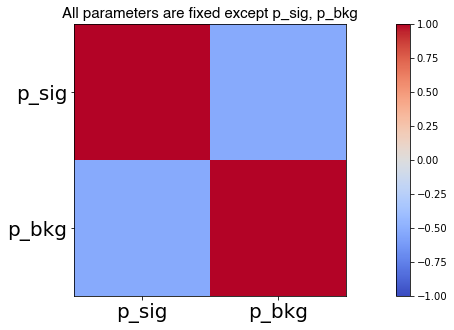

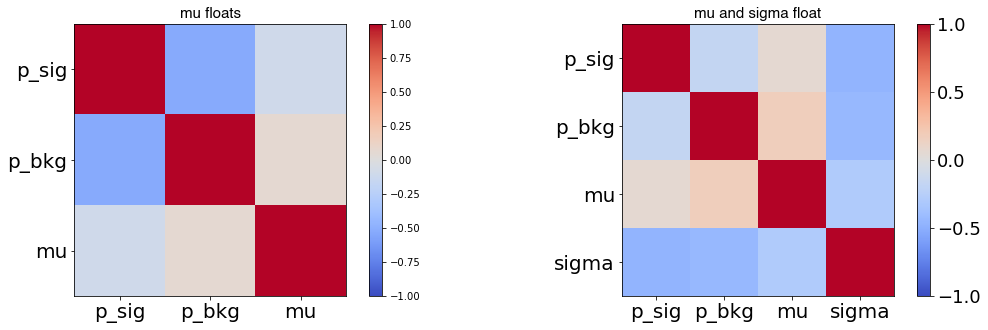

In [52]:
eta_std_devs_fixed_params = np.sqrt(np.diag(eta_pcov_fixed_params))
eta_correlation_matrix_fixed_params = eta_pcov_fixed_params / np.outer(eta_std_devs_fixed_params, eta_std_devs_fixed_params)

eta_std_devs_mu_float = np.sqrt(np.diag(eta_pcov_mu_float))
eta_correlation_matrix_mu_float = eta_pcov_mu_float / np.outer(eta_std_devs_mu_float, eta_std_devs_mu_float)

eta_std_devs_musigma_float = np.sqrt(np.diag(eta_pcov_musigma_float))
eta_correlation_matrix_musigma_float = eta_pcov_musigma_float / np.outer(eta_std_devs_musigma_float, eta_std_devs_musigma_float)

l_fixed_params = ['p_sig', 'p_bkg']
l_mu_float = ['p_sig', 'p_bkg', 'mu']
l_musigma_float = ['p_sig', 'p_bkg', 'mu', 'sigma']

plt.figure(figsize=(18,5))
plt.imshow(eta_correlation_matrix_fixed_params, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(np.arange(2), l_fixed_params, fontsize=20)
plt.yticks(np.arange(2), l_fixed_params, fontsize=20)
plt.title('All parameters are fixed except p_sig, p_bkg', fontdict=form_title)
plt.colorbar()

plt.figure(figsize=(18,5))
plt.subplot(121)
plt.imshow(eta_correlation_matrix_mu_float, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(np.arange(3), l_mu_float, fontsize=20)
plt.yticks(np.arange(3), l_mu_float, fontsize=20)
plt.title('mu floats', fontdict=form_title)
plt.colorbar()

plt.subplot(122)
plt.imshow(eta_correlation_matrix_musigma_float, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(np.arange(4), l_musigma_float, fontsize=20)
plt.yticks(np.arange(4), l_musigma_float, fontsize=20)
plt.title('mu and sigma float', fontdict=form_title)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
plt.show()

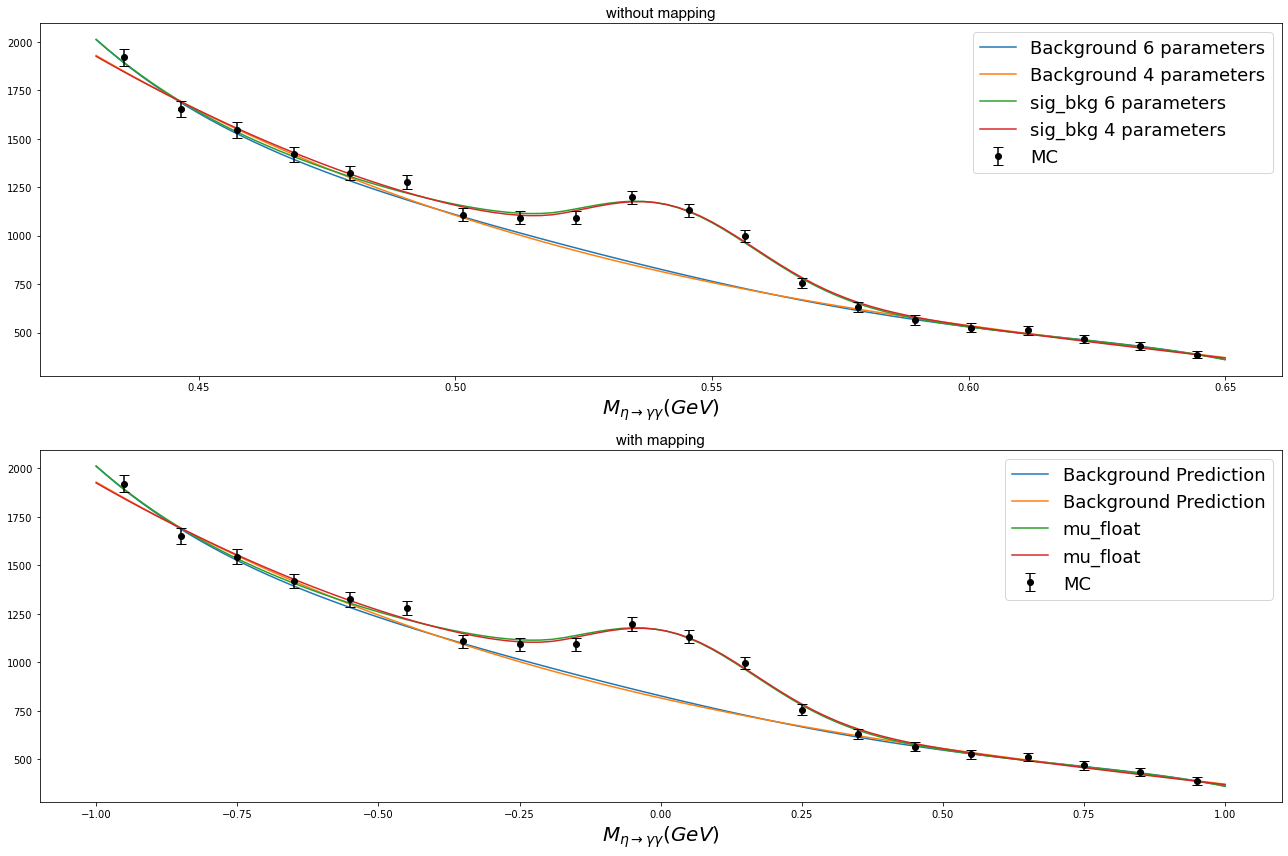

In [53]:
p0 = [0.8, 1]

def crystal_legendre6(x, *params):
    p_signal, p_background= params
    return p_signal * crystal_ball(x, *eta_sig_popt) + p_background * legendre(x, *eta_bkg_popt6)

def crystal_legendre4(x, *params):
    p_signal, p_background= params
    return p_signal * crystal_ball(x, *eta_sig_popt) + p_background * legendre(x, *eta_bkg_popt4)

def crystal_legendre_mapped6(x, *params):
    p_signal, p_background= params
    return p_signal * crystal_ball(x, *eta_sig_popt_mapped) + p_background * legendre(x, *eta_bkg_popt_mapped6)

def crystal_legendre_mapped4(x, *params):
    p_signal, p_background= params
    return p_signal * crystal_ball(x, *eta_sig_popt_mapped) + p_background * legendre(x, *eta_bkg_popt_mapped4)

popt6, pcov6, info6, msg6, ier6 = curve_fit(crystal_legendre6, eta_x_data, eta_y_data, p0=p0, full_output=True, sigma=eta_yerr)
popt4, pcov4, info4, msg4, ier4 = curve_fit(crystal_legendre4, eta_x_data, eta_y_data, p0=p0, full_output=True, sigma=eta_yerr)
popt_mapped6, pcov_mapped6, info_mapped6, msg_mapped6, ier_mapped6 = curve_fit(crystal_legendre_mapped6, eta_x_data_mapped, eta_y_data, p0=p0, full_output=True, sigma=eta_yerr)
popt_mapped4, pcov_mapped4, info_mapped4, msg_mapped4, ier_mapped4 = curve_fit(crystal_legendre_mapped4, eta_x_data_mapped, eta_y_data, p0=p0, full_output=True, sigma=eta_yerr)

plt.figure(figsize=(18,12))
plt.subplot(211)
x_range = np.linspace(np.min(eta_edges_mincan), np.max(eta_edges_mincan), 100)
plt.plot(x_range, legendre(x_range, *eta_bkg_popt6), label='Background 6 parameters')
plt.plot(x_range, legendre(x_range, *eta_bkg_popt4), label='Background 4 parameters')
plt.plot(x_range, crystal_legendre6(x_range, *popt6), label='sig_bkg 6 parameters')
plt.plot(x_range, crystal_legendre4(x_range, *popt4), label='sig_bkg 4 parameters')
plt.errorbar(eta_x_data, eta_y_data, yerr=eta_yerr, ls='', color='k', fmt='o', capsize=5, label='MC')
plt.xlabel(r'$M_{\eta \rightarrow \gamma \gamma} (GeV)$', fontdict=form_label)
plt.title('without mapping', fontdict=form_title)
plt.legend(fontsize=18)

plt.subplot(212)
x_range_mapped = np.linspace(np.min(y), np.max(y), 100)
plt.plot(x_range_mapped, legendre(x_range_mapped, *eta_bkg_popt_mapped6), label='Background Prediction')
plt.plot(x_range_mapped, legendre(x_range_mapped, *eta_bkg_popt_mapped4), label='Background Prediction')
plt.plot(x_range_mapped, crystal_legendre_mapped6(x_range_mapped, *popt_mapped6), label='mu_float')
plt.plot(x_range_mapped, crystal_legendre_mapped4(x_range_mapped, *popt_mapped4), label='mu_float')
plt.errorbar(eta_x_data_mapped, eta_y_data, yerr=eta_yerr, ls='', color='k', fmt='o', capsize=5, label='MC')
plt.xlabel(r'$M_{\eta \rightarrow \gamma \gamma} (GeV)$', fontdict=form_label)
plt.title('with mapping', fontdict=form_title)
plt.legend(fontsize=18)

plt.tight_layout()

In [59]:
# def crystal_legendre_fixed_params_mapped(x, *params):
#     p_signal, p_background= params
#     return p_signal * crystal_ball(x, *eta_sig_popt_mapped) + p_background * legendre(x, *eta_bkg_popt_mapped6)

# def crystal_legendre_mu_float_mapped(x, *params):
#     p_signal, p_background, mu = params
#     return p_signal * crystal_ball(x, mu, *eta_sig_popt_mapped[1:]) + p_background * legendre(x, *eta_bkg_popt_mapped6)

# def crystal_legendre_musigma_float_mapped(x, *params):
#     p_signal, p_background, mu, sigma = params
#     return p_signal * crystal_ball(x, mu, sigma, *eta_sig_popt_mapped[2:]) + p_background * legendre(x, *eta_bkg_popt_mapped6)


In [60]:
# p0_fixed_params = [0.8, 1]
# p0_mu_float = [0.8, 1, 0.027]
# p0_musigma_float = [0.8, 1, 0.027, 0.1]
# eta_popt_fixed_params_mapped, eta_pcov_fixed_params_mapped, eta_info_fixed_params_mapped, eta_msg_fixed_params_mapped, eta_ier_fixed_params_mapped = curve_fit(crystal_legendre_fixed_params_mapped, eta_x_data, eta_y_data, p0=p0_fixed_params, full_output=True, sigma=eta_yerr)
# eta_popt_mu_float_mapped, eta_pcov_mu_float_mapped, eta_info_mu_float_mapped, eta_msg_mu_float_mapped, eta_ier_mu_float_mapped = curve_fit(crystal_legendre_mu_float_mapped, eta_x_data, eta_y_data, p0=p0_mu_float, full_output=True, sigma=eta_yerr)
# eta_popt_musigma_float_mapped, eta_pcov_musigma_float_mapped, eta_info_musigma_float_mapped, eta_msg_musigma_float_mapped, eta_ier_musigma_float_mapped = curve_fit(crystal_legendre_musigma_float_mapped, eta_x_data, eta_y_data, p0=p0_musigma_float, full_output=True, sigma=eta_yerr)

# # degrees of freedom
# eta_ndf_fixed_params_mapped = ndf(eta_x_data, eta_popt_fixed_params_mapped)
# eta_ndf_mu_float_mapped = ndf(eta_x_data, eta_popt_mu_float_mapped)
# eta_ndf_musigma_float_mapped = ndf(eta_x_data, eta_popt_musigma_float_mapped)

# plt.figure(figsize=(18,8))
# x_range = np.linspace(np.min(y), np.max(y), 100)
# plt.plot(x_range, legendre(x_range, *eta_bkg_popt6), label='Background Prediction', color='orange')
# plt.plot(x_range, crystal_legendre_mu_float_mapped(x_range, *eta_popt_mu_float_mapped), label='mu_float', color='r')
# plt.plot(x_range, crystal_legendre_musigma_float_mapped(x_range, *eta_popt_musigma_float_mapped), label='mu and sigma float', color='g')
# plt.plot(x_range, crystal_legendre_fixed_params_mapped(x_range, *eta_popt_fixed_params_mapped), label='Crystalball_Legendre Function', color='b')
# plt.errorbar(eta_x_data_mapped, eta_y_data, yerr=eta_yerr, ls='', color='k', fmt='o', capsize=5, label='MC')
# plt.xlabel(r'$M_{\eta \rightarrow \gamma \gamma} (GeV)$', fontdict=form_label)
# plt.text(0.55, 1000,f'''
# Fitting Test:
#     $\chi^2/NDF$: {np.dot(eta_info_fixed_params_mapped['fvec'], eta_info_fixed_params_mapped['fvec']):.4f} / {eta_ndf_fixed_params_mapped}
#     p_value: {1 - stats.chi2.cdf(np.dot(eta_info_fixed_params_mapped['fvec'], eta_info_fixed_params_mapped['fvec']), eta_ndf_fixed_params_mapped):.7f}
# Parameters:
#     p_signal: {eta_popt_fixed_params_mapped[0]:.2f} \u00B1 {np.sqrt(np.diag(eta_pcov_fixed_params_mapped))[0]:.2f}
#     p_background: {eta_popt_fixed_params_mapped[1]:.2f} \u00B1 {np.sqrt(np.diag(eta_pcov_fixed_params_mapped))[1]:.2f}
#     ''', fontsize=30)

# plt.legend(fontsize=18, loc='lower left')